In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
from scipy.stats import chisquare


In [26]:
#read in csv data on alcohol related crashes in PA in 2019 and 2020
crash_2019_int = pd.read_csv("../Crash_Data/dui_2019_csv")
crash_2020_df = pd.read_csv("../Crash_Data/dui_csv")
#read in csv data on alcohol related crashes in PA in 2018
crash_2018_df = pd.read_csv("dui_2018_csv")


In [3]:
crash_2019_int

,CRN,COUNTY,CRASH_MONTH,DEC_LAT,DEC_LONG,FATAL_COUNT,ALCOHOL_RELATED,DRINKING_DRIVER,UNDERAGE_DRNK_DRV,COUNTY NAME
0,2020051395,22.0,8.0,40.2853,-76.7057,0.0,1.0,1.0,0.0,DAUPHIN
1,2020061721,11.0,7.0,40.4416,-78.8916,0.0,1.0,1.0,0.0,CAMBRIA
2,2019005958,25.0,1.0,41.8799,-80.2201,0.0,1.0,1.0,0.0,ERIE
3,2019014882,21.0,1.0,40.1555,-77.1958,1.0,1.0,0.0,0.0,CUMBERLAND
4,2019049811,17.0,4.0,40.9779,-78.5027,1.0,1.0,1.0,0.0,CLEARFIELD
...,...,...,...,...,...,...,...,...,...,...
9285,2019122846,62.0,11.0,40.3843,-80.4226,0.0,1.0,1.0,0.0,WASHINGTON
9286,2019129541,28.0,11.0,39.9053,-77.6722,0.0,1.0,1.0,0.0,FRANKLIN
9287,2019132420,37.0,12.0,40.9990,-80.3349,0.0,1.0,1.0,0.0,LAWRENCE
9288,2019132209,7.0,12.0,40.4706,-78.3994,0.0,1.0,0.0,0.0,BLAIR


In [4]:
crash_2019_int["COUNTY"].fillna(0,inplace=True)

In [5]:
crash_2019_int["CRASH_MONTH"].fillna(0,inplace=True)

In [6]:
crash_2019_int.dtypes

CRN                    int64
COUNTY               float64
CRASH_MONTH          float64
DEC_LAT              float64
DEC_LONG             float64
FATAL_COUNT          float64
ALCOHOL_RELATED      float64
DRINKING_DRIVER      float64
UNDERAGE_DRNK_DRV    float64
COUNTY NAME           object
dtype: object

In [7]:
crash_2019_int["CRASH_MONTH"].astype(int)

0        8
1        7
2        1
3        1
4        4
        ..
9285    11
9286    11
9287    12
9288    12
9289     0
Name: CRASH_MONTH, Length: 9290, dtype: int64

In [8]:

crash_2019_int["COUNTY"] = crash_2019_int["COUNTY"].astype(int)
crash_2019_int.dtypes

CRN                    int64
COUNTY                 int64
CRASH_MONTH          float64
DEC_LAT              float64
DEC_LONG             float64
FATAL_COUNT          float64
ALCOHOL_RELATED      float64
DRINKING_DRIVER      float64
UNDERAGE_DRNK_DRV    float64
COUNTY NAME           object
dtype: object

In [9]:

crash_2019_int["CRASH_MONTH"] = crash_2019_int["CRASH_MONTH"].astype(int)
crash_2019_int.dtypes

CRN                    int64
COUNTY                 int64
CRASH_MONTH            int64
DEC_LAT              float64
DEC_LONG             float64
FATAL_COUNT          float64
ALCOHOL_RELATED      float64
DRINKING_DRIVER      float64
UNDERAGE_DRNK_DRV    float64
COUNTY NAME           object
dtype: object

In [10]:
crash_2019_int["CRASH_MONTH"] = crash_2019_int["CRASH_MONTH"].astype(int)
crash_2019_int.dtypes

CRN                    int64
COUNTY                 int64
CRASH_MONTH            int64
DEC_LAT              float64
DEC_LONG             float64
FATAL_COUNT          float64
ALCOHOL_RELATED      float64
DRINKING_DRIVER      float64
UNDERAGE_DRNK_DRV    float64
COUNTY NAME           object
dtype: object

In [13]:
aggregate_2020 = crash_2020_df.groupby(["COUNTY NAME", "CRASH_MONTH"]).sum()

In [14]:
aggregate_2020.reset_index(inplace=True)

In [15]:
jan_jun_20 = aggregate_2020[(aggregate_2020["CRASH_MONTH"] >= 1) & (aggregate_2020["CRASH_MONTH"] <= 6)]

In [25]:
#create copies to work with
crashes_2018 = crash_2018_df.copy()
crashes_2019 = crash_2019_int.copy()

In [20]:
aggregate_2019_b = crashes_2019.groupby(["COUNTY NAME", "CRASH_MONTH"]).sum()

In [21]:
aggregate_2019_b.reset_index(inplace=True)

In [22]:
jul_dec_19 = aggregate_2019_b[(aggregate_2019_b["CRASH_MONTH"] >=7)]

In [23]:
jan_jun_19 = aggregate_2019_b[(aggregate_2019_b["CRASH_MONTH"] >=1) & (aggregate_2019_b["CRASH_MONTH"] <= 6)]

In [27]:
aggregate_2018 = crashes_2018.groupby(["COUNTY NAME", "CRASH_MONTH"]).sum()

In [28]:
aggregate_2018.reset_index(inplace=True)

In [29]:
jul_dec_18 = aggregate_2018[(aggregate_2018["CRASH_MONTH"] >=7)]

In [30]:
#crash_2018_df[].fillna(0,inplace=True)

SyntaxError: invalid syntax (<ipython-input-30-66000d7eb843>, line 1)

In [31]:
fiscal_18_19 = pd.concat([jul_dec_18, jan_jun_19])
fiscal_18_19

,COUNTY NAME,CRASH_MONTH,CRN,COUNTY,DEC_LAT,DEC_LONG,FATAL_COUNT,ALCOHOL_RELATED,DRINKING_DRIVER,UNDERAGE_DRNK_DRV
6,ADAMS,7,6054232448,3,119.6197,-231.6042,0.0,3.0,3.0,0.0
7,ADAMS,8,18162840184,9,358.8495,-694.9737,0.0,9.0,9.0,0.0
8,ADAMS,9,12108567938,6,239.1637,-462.8862,0.0,6.0,6.0,0.0
9,ADAMS,10,22199221967,11,437.8259,-848.9125,1.0,11.0,11.0,1.0
10,ADAMS,11,18163995810,9,358.7957,-693.8644,0.0,9.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...
742,YORK,2,56532711710,1848,1120.1279,-2149.8112,0.0,28.0,28.0,2.0
743,YORK,3,98932738232,3234,1955.9023,-3761.8268,1.0,49.0,49.0,2.0
744,YORK,4,82780821742,2706,1637.0783,-3144.3070,0.0,41.0,40.0,2.0
745,YORK,5,62590767904,2046,1238.3904,-2378.4674,0.0,31.0,30.0,4.0


In [32]:
fiscal_19_20 = pd.concat([jul_dec_19, jan_jun_20])
fiscal_19_20

,COUNTY NAME,CRASH_MONTH,CRN,COUNTY,DEC_LAT,DEC_LONG,FATAL_COUNT,ALCOHOL_RELATED,DRINKING_DRIVER,UNDERAGE_DRNK_DRV
6,ADAMS,7,14133542033,7,279.0975,-540.4810,0.0,7.0,7.0,1.0
7,ADAMS,8,6057268056,3,119.3747,-231.7026,0.0,3.0,3.0,0.0
8,ADAMS,9,6057287220,3,119.6195,-231.7942,0.0,3.0,3.0,0.0
9,ADAMS,10,8076422240,4,159.7113,-308.1973,0.0,4.0,4.0,0.0
10,ADAMS,11,24229473039,12,478.5469,-926.5061,0.0,12.0,12.0,1.0
...,...,...,...,...,...,...,...,...,...,...
710,YORK,2,40400431159,1320,799.7893,-1535.4961,0.0,20.0,20.0,1.0
711,YORK,3,40400597645,1320,799.2096,-1534.2619,0.0,20.0,19.0,0.0
712,YORK,4,28280541877,924,558.4227,-1073.9749,2.0,14.0,14.0,2.0
713,YORK,5,32320710103,1056,639.4371,-1227.2777,0.0,16.0,16.0,1.0


In [33]:
alcohol_sales_df = pd.read_csv("../Data Sources/compiled_sales_2018_to_2020.csv")

In [34]:
alcohol_sales_df.head()

,County,2017-2018 Year Total ($),2018-2019 Year Total ($),2019-2020 Year Total ($)
0,Adams,5974649.0,6087119.0,5474672.0
1,Allegheny,287446445.0,297562217.0,282457996.0
2,Armstrong,4119789.0,4100004.0,3946644.0
3,Beaver,20662151.0,21929547.0,21044165.0
4,Bedford,3794119.0,3777616.0,3624763.0


In [35]:

# find totals

total_18_19 = fiscal_18_19.groupby("COUNTY NAME").sum()["ALCOHOL_RELATED"]

sales_18_19 = alcohol_sales_df.groupby("County").mean()["2018-2019 Year Total ($)"]
sales_18_19

County
Adams             6087119.0
Allegheny       297562217.0
Armstrong         4100004.0
Beaver           21929547.0
Bedford           3777616.0
                   ...     
Washington       32219420.0
Wayne            12861710.0
Westmoreland     63286292.0
Wyoming           2920391.0
York             61521893.0
Name: 2018-2019 Year Total ($), Length: 67, dtype: float64

In [36]:
#calculate linear regression for 2018-219 dui crashes and alcohol sales
pearson_18_19 = st.pearsonr(total_18_19,sales_18_19)
print(f"For 2018-19 dui crashes and alcohol sales the Pearson r value is {pearson_18_19[0]} and the Pearson p value is {pearson_18_19[1]}")
print(f"The 2018-19 r-squared value is {pearson_18_19[0]*pearson_18_19[0]}")

(slope_18_19, intercept_18_19, rvalue_18_19, pvalue_18_19, stderr_18_19) = linregress(total_18_19,sales_18_19)

regress_values_18_19 = (total_18_19 * slope_18_19 + intercept_18_19)

equation_18_19 = "y = "+str(round(slope_18_19,2))+"x+" +str(round(intercept_18_19,2))

regress_values_18_19

For 2018-19 dui crashes and alcohol sales the Pearson r value is 0.9366404960132564 and the Pearson p value is 2.5663349127281006e-31
The 2018-19 r-squared value is 0.8772954187719589


COUNTY NAME
ADAMS           1.492139e+07
ALLEGHENY       2.955407e+08
ARMSTRONG       1.310312e+07
BEAVER          3.189189e+07
BEDFORD         6.436140e+06
                    ...     
WASHINGTON      5.068066e+07
WAYNE           2.496560e+06
WESTMORELAND    8.553079e+07
WYOMING        -8.369314e+05
YORK            1.179566e+08
Name: ALCOHOL_RELATED, Length: 67, dtype: float64

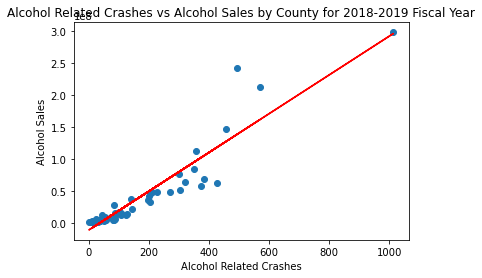

In [71]:

#create a scatter plot

plt.scatter(total_18_19 , sales_18_19)
plt.xlabel("Alcohol Related Crashes")
plt.ylabel("Alcohol Sales")
plt.title("Alcohol Related Crashes vs Alcohol Sales by County for 2018-2019 Fiscal Year")
plt.plot(total_18_19, regress_values_18_19, "r-")
#plt.annotate(equation_18_19,(3,3),color="r")
plt.savefig('crashes_sales_18_19.png')
plt.show()

In [38]:
# find totals

total_19_20 = fiscal_19_20.groupby("COUNTY NAME").sum()["ALCOHOL_RELATED"]

sales_19_20 = alcohol_sales_df.groupby("County").mean()["2019-2020 Year Total ($)"]

In [39]:
#calculate linear regression for 2019-20 dui crashes and alcohol sales
pearson_19_20 = st.pearsonr(total_19_20,sales_19_20)
print(f"For 2019-20 dui crashes and alcohol sales the Pearson r value is {pearson_19_20[0]} and the Pearson p value is {pearson_19_20[1]}")
print(f"The 2019-20 r-squared value is {pearson_19_20[0]*pearson_19_20[0]}")

(slope_19_20, intercept_19_20, rvalue_19_20, pvalue_19_20, stderr_19_20) = linregress(total_19_20,sales_19_20)

regress_values_19_20 = (total_19_20 * slope_19_20 + intercept_19_20)

equation_19_20 = "y = "+str(round(slope_19_20,2))+"x+" +str(round(intercept_19_20,2))

regress_values_19_20

For 2019-20 dui crashes and alcohol sales the Pearson r value is 0.9539609058481805 and the Pearson p value is 1.0472004734032858e-35
The 2019-20 r-squared value is 0.9100414098866811


COUNTY NAME
ADAMS           1.195280e+07
ALLEGHENY       2.784279e+08
ARMSTRONG       9.090900e+06
BEAVER          2.658032e+07
BEDFORD         1.871970e+05
                    ...     
WASHINGTON      5.170148e+07
WAYNE           2.095133e+06
WESTMORELAND    7.332476e+07
WYOMING        -2.038729e+06
YORK            8.731629e+07
Name: ALCOHOL_RELATED, Length: 67, dtype: float64

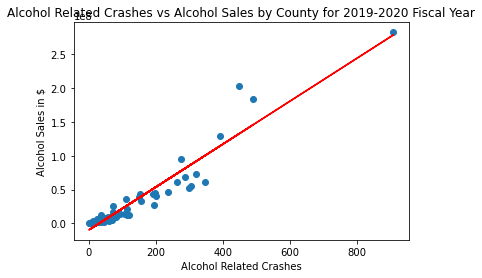

In [40]:

#create a scatter plot

plt.scatter(total_19_20 , sales_19_20)
plt.xlabel("Alcohol Related Crashes")
plt.ylabel("Alcohol Sales in $")
plt.title("Alcohol Related Crashes vs Alcohol Sales by County for 2019-2020 Fiscal Year")
plt.plot(total_19_20, regress_values_19_20, "r-")
plt.savefig('crashes_sales_19_20.png')
plt.show()

In [42]:
# read in population by county data
population_df = pd.read_csv("pop_data.csv")


In [43]:
population_df.head(68)

,County,2018,2019
0,".Adams County, Pennsylvania",103062.0,103009.0
1,".Allegheny County, Pennsylvania",1217281.0,1216045.0
2,".Armstrong County, Pennsylvania",65352.0,64735.0
3,".Beaver County, Pennsylvania",164582.0,163929.0
4,".Bedford County, Pennsylvania",48094.0,47888.0
...,...,...,...
63,".Wayne County, Pennsylvania",51395.0,51361.0
64,".Westmoreland County, Pennsylvania",350459.0,348899.0
65,".Wyoming County, Pennsylvania",27087.0,26794.0
66,".York County, Pennsylvania",447847.0,449058.0


In [44]:
#drop row with null values
population_df.dropna(inplace=True)

In [45]:
pop_df = population_df.copy()

#remove . from County column

pop_df["County"] = pop_df["County"].str.split(".").str[1]

In [46]:
pop_df

,County,2018,2019
0,"Adams County, Pennsylvania",103062.0,103009.0
1,"Allegheny County, Pennsylvania",1217281.0,1216045.0
2,"Armstrong County, Pennsylvania",65352.0,64735.0
3,"Beaver County, Pennsylvania",164582.0,163929.0
4,"Bedford County, Pennsylvania",48094.0,47888.0
...,...,...,...
62,"Washington County, Pennsylvania",207018.0,206865.0
63,"Wayne County, Pennsylvania",51395.0,51361.0
64,"Westmoreland County, Pennsylvania",350459.0,348899.0
65,"Wyoming County, Pennsylvania",27087.0,26794.0


In [48]:
#remove ,Pennsylvania from County column

pop_df["County"] = pop_df["County"].str.split(",").str[0]

In [49]:
pop_df

,County,2018,2019
0,Adams County,103062.0,103009.0
1,Allegheny County,1217281.0,1216045.0
2,Armstrong County,65352.0,64735.0
3,Beaver County,164582.0,163929.0
4,Bedford County,48094.0,47888.0
...,...,...,...
62,Washington County,207018.0,206865.0
63,Wayne County,51395.0,51361.0
64,Westmoreland County,350459.0,348899.0
65,Wyoming County,27087.0,26794.0


In [50]:
pop_df.dtypes

County     object
2018      float64
2019      float64
dtype: object

In [51]:
collective_df = pd.DataFrame({"County" : alcohol_sales_df["County"], "Population 2018": pop_df["2018"],
                              "Population 2019": pop_df["2019"], "Alcohol Sales 2018-2019": alcohol_sales_df["2018-2019 Year Total ($)"], 
                              "Alcohol Sales 2019-2020": alcohol_sales_df["2019-2020 Year Total ($)"], 
                              "Crashes 2018-2019":total_18_19.values,"Crashes 2019-2020":total_19_20.values})
collective_df

,County,Population 2018,Population 2019,Alcohol Sales 2018-2019,Alcohol Sales 2019-2020,Crashes 2018-2019,Crashes 2019-2020
0,Adams,103062.0,103009.0,6087119.0,5474672.0,87.0,69.0
1,Allegheny,1217281.0,1216045.0,297562217.0,282457996.0,1013.0,907.0
2,Armstrong,65352.0,64735.0,4100004.0,3946644.0,81.0,60.0
3,Beaver,164582.0,163929.0,21929547.0,21044165.0,143.0,115.0
4,Bedford,48094.0,47888.0,3777616.0,3624763.0,59.0,32.0
...,...,...,...,...,...,...,...
62,Washington,207018.0,206865.0,32219420.0,26798762.0,205.0,194.0
63,Wayne,51395.0,51361.0,12861710.0,12246352.0,46.0,38.0
64,Westmoreland,350459.0,348899.0,63286292.0,60414024.0,320.0,262.0
65,Wyoming,27087.0,26794.0,2920391.0,3026001.0,35.0,25.0


In [52]:
top_3_population = collective_df.sort_values(by=['Population 2018'], ascending=False)[0:3]
top_3_population

,County,Population 2018,Population 2019,Alcohol Sales 2018-2019,Alcohol Sales 2019-2020,Crashes 2018-2019,Crashes 2019-2020
50,Philadelphia,1583592.0,1584064.0,241305526.0,203173005.0,493.0,447.0
1,Allegheny,1217281.0,1216045.0,297562217.0,282457996.0,1013.0,907.0
45,Montgomery,826924.0,830915.0,212777142.0,184319535.0,569.0,489.0


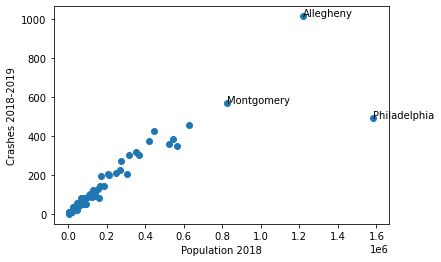

In [53]:
#create a scatter plot

plt.scatter(collective_df["Population 2018"] , total_18_19.values)
plt.xlabel("Population 2018")
plt.ylabel("Crashes 2018-2019")
for i in range(3):
    plt.text(top_3_population["Population 2018"].values[i], top_3_population["Crashes 2018-2019"].values[i], top_3_population["County"].values[i])
# plt.title("Alcohol Related Crashes vs Alcohol Sales by County for 2019-2020 Fiscal Year")
# plt.plot(total_19_20, regress_values_19_20, "r-")
# plt.savefig('crashes_sales_19_20.png')
plt.show()

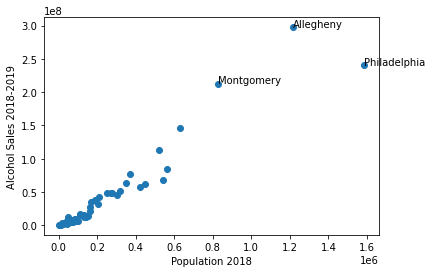

In [54]:
#create a scatter plot

plt.scatter(collective_df["Population 2018"] , collective_df["Alcohol Sales 2018-2019"])
plt.xlabel("Population 2018")
plt.ylabel("Alcohol Sales 2018-2019")
for i in range(3):
    plt.text(top_3_population["Population 2018"].values[i], top_3_population["Alcohol Sales 2018-2019"].values[i], top_3_population["County"].values[i])
# plt.title("Alcohol Related Crashes vs Alcohol Sales by County for 2019-2020 Fiscal Year")
# plt.plot(total_19_20, regress_values_19_20, "r-")
# plt.savefig('crashes_sales_19_20.png')
plt.show()

In [55]:
# chi square test

# Null hypothesis: 

Crashes_per_capita_2018_2019 = collective_df["Crashes 2018-2019"] / collective_df["Population 2018"]
mean_Crashes_per_capita_2018_2019 = collective_df["Crashes 2018-2019"].sum() / collective_df["Population 2018"].sum()
print(Crashes_per_capita_2018_2019)
print(mean_Crashes_per_capita_2018_2019)

0     0.000844
1     0.000832
2     0.001239
3     0.000869
4     0.001227
        ...   
62    0.000990
63    0.000895
64    0.000913
65    0.001292
66    0.000953
Length: 67, dtype: float64
0.0007493210254698841


In [62]:
#calculate the chisq for crashes per 1,000 residents by county in 2018-2019 fiscal year
# null hypothesis: crashes occur at an equal frequency per 1,000 residents across counties
# alternative hypothesis: crashes do not occur at an equal frequency per 1,000 residents across counties
c_1819_chisq, c_1819_p = st.stats.chisquare(Crashes_per_capita_2018_2019.values * 100000)

In [63]:
print(f"The chisq value is {c_1819_chisq}")

The chisq value is 462.9335416361648


In [64]:
print(f"The p value is {c_1819_p}")

The p value is 6.0673180388823306e-61
